<a href="https://colab.research.google.com/github/21Stonney/Deep-Learning/blob/main/Image_classification_in_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Processing

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

Load the fashion MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Normalize the image data to range between 0 and 1

In [3]:
train_images = train_images/255.0
test_images = test_images/255.0

Reshape the data to fit the model input requirements

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

Convert the labels into one-hot vectors

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## **Model Development**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Designing a CNN

In [7]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Model Training**

Compiling the model

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model on the training data

In [9]:
history=model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6950 - loss: 0.8368 - val_accuracy: 0.8507 - val_loss: 0.4095
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8587 - loss: 0.3900 - val_accuracy: 0.8757 - val_loss: 0.3441
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.8851 - loss: 0.3088 - val_accuracy: 0.8839 - val_loss: 0.3154
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.8968 - loss: 0.2799 - val_accuracy: 0.8849 - val_loss: 0.3101
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9062 - loss: 0.2549 - val_accuracy: 0.9047 - val_loss: 0.2583
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9156 - loss: 0.2284 - val_accuracy: 0.9008 - val_loss: 0.2712
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9190 - loss: 0.2176 - val_accuracy: 0.9079 - val_loss: 0.2579
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9287 - loss: 0.1935 - 

## **Evaluation and analysis**

In [10]:
import matplotlib.pyplot as plt

Evaluate the models performance on the test dataset

In [11]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9035 - loss: 0.2759


Plot the training and validation accuracy and loss over epochs

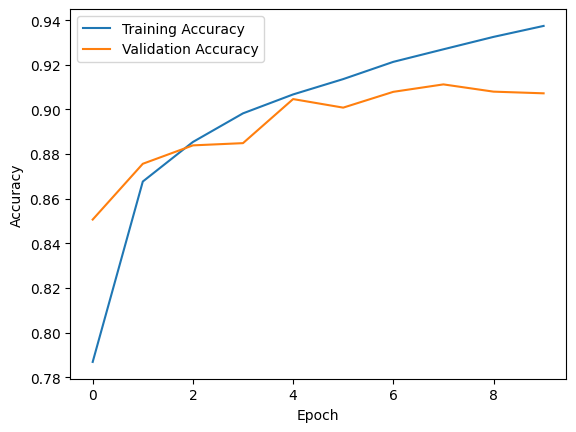

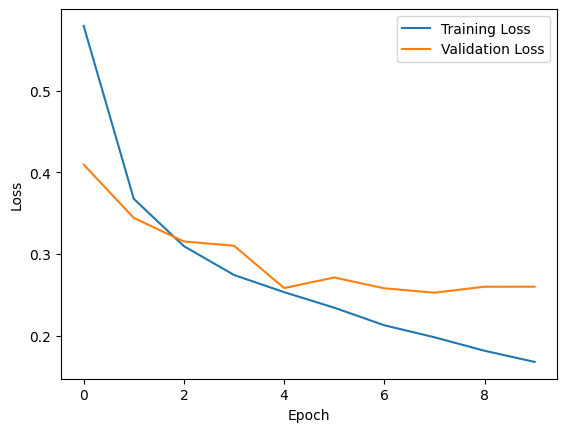

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Display sample images with their predicted and actual labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


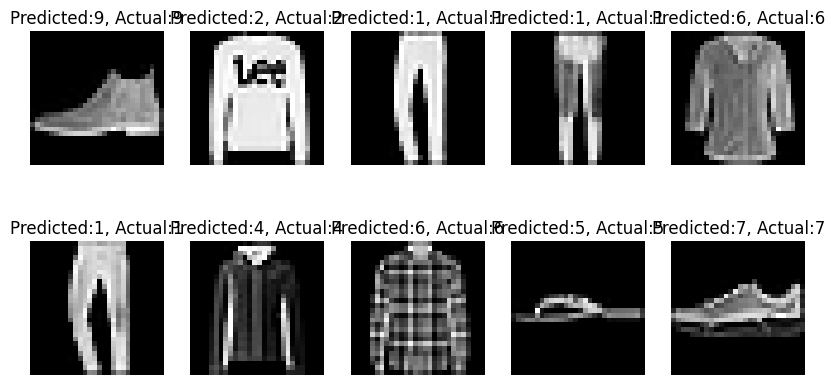

In [13]:
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)
actual_labels = tf.argmax(test_labels, axis=1)

sample_images=test_images[:10]
sample_predicted_labels=predicted_labels[:10]
sample_actual_labels=actual_labels[:10]

plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted:{sample_predicted_labels[i]}, Actual:{sample_actual_labels[i]}")
  plt.axis('off')

plt.show()